In [1]:
library(igraph)

options(repr.plot.width = 12, repr.plot.height = 8)


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [2]:
df = data.frame("n1"=c('A','A','A','A', 'B', 'C', 'F', 'E', 'D', 'A', 'P', 'P', 'B'),
                "n2"=c('B','C','E','F', 'C', 'F', 'D', 'D', 'A', 'P', 'Q', 'R', 'R'),
                
                "weight"=c(2, 3, 2, 5, 3, 3, 1, 2, 3, 2, 4, 2, 2))

df

n1,n2,weight
<chr>,<chr>,<dbl>
A,B,2
A,C,3
A,E,2
A,F,5
B,C,3
C,F,3
F,D,1
E,D,2
D,A,3


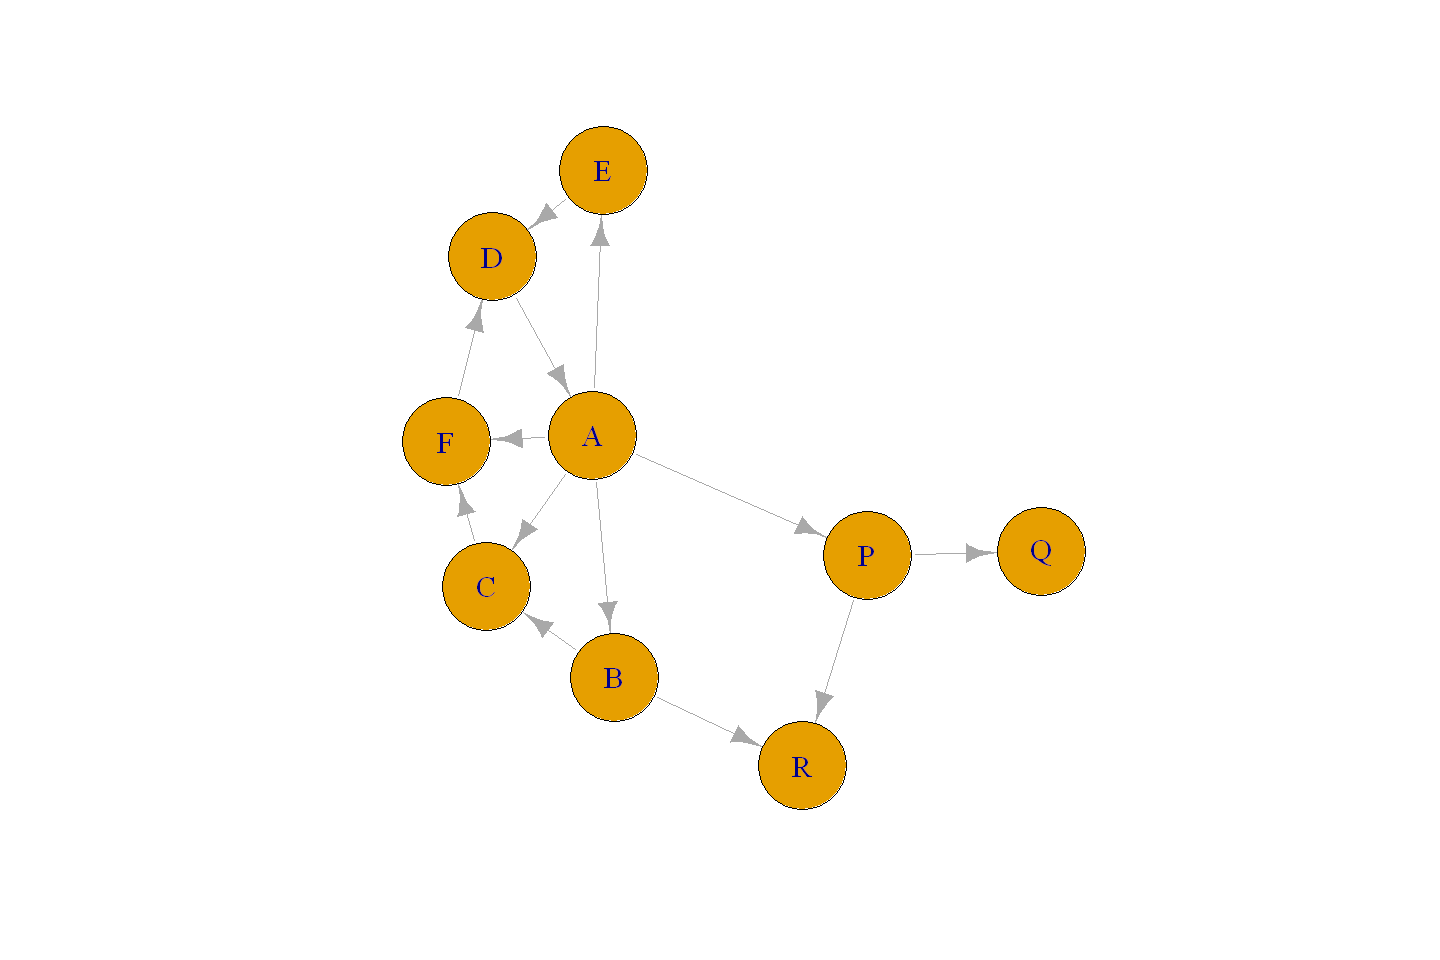

In [3]:
graph_df <- graph_from_data_frame(df, directed = T)

plot(graph_df, vertex.size = 30, vertex.label.cex = 1.5)

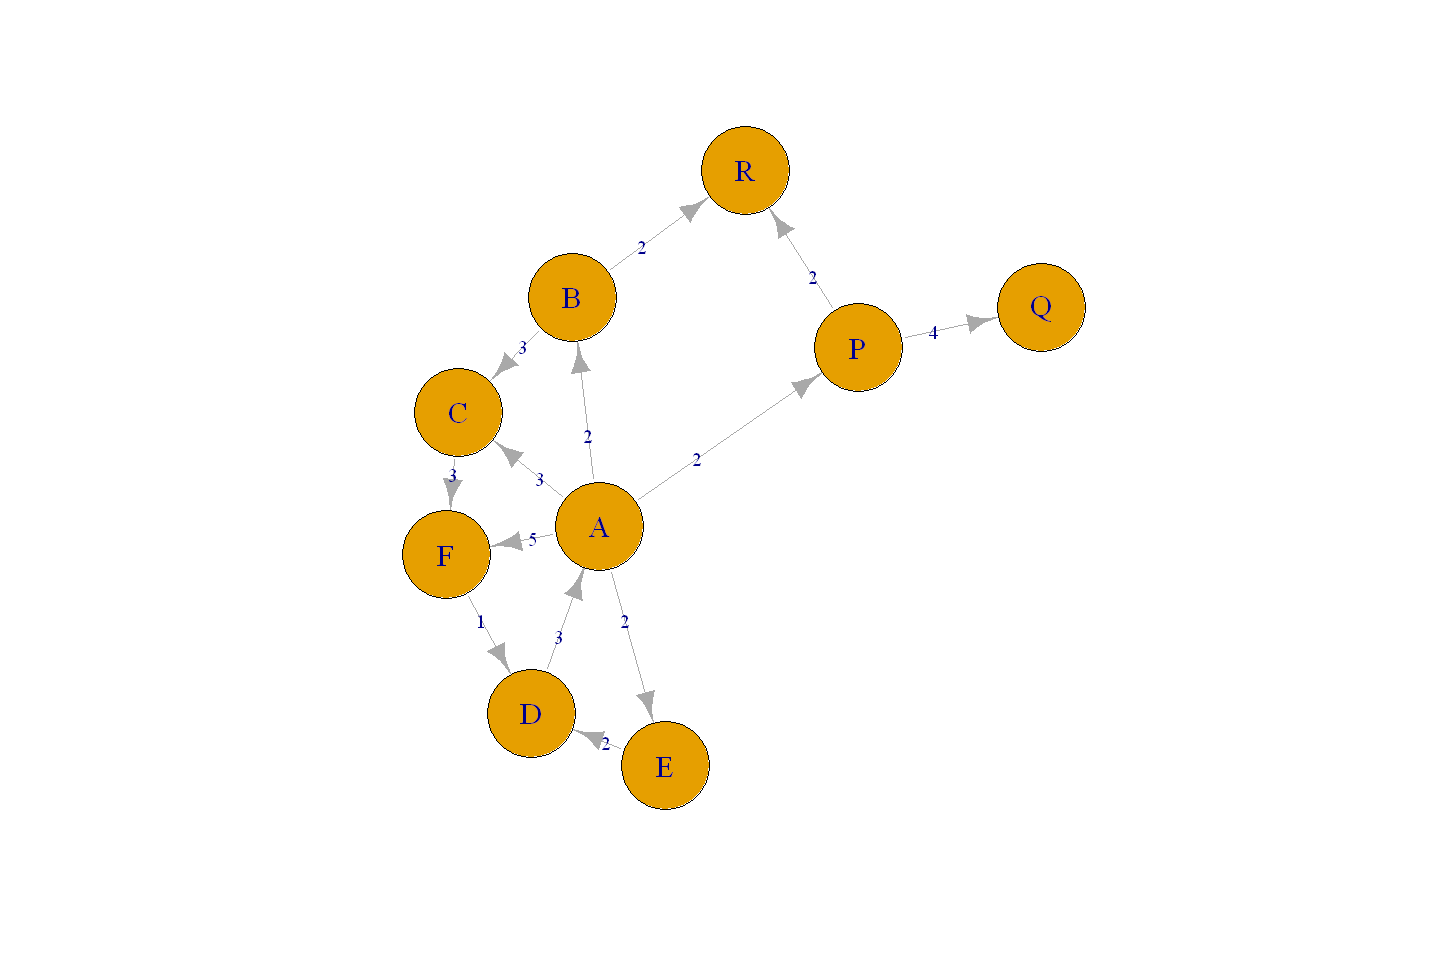

In [4]:
graph_df <- set_edge_attr(graph_df, "label", value = E(graph_df)$weight)

plot(graph_df, vertex.size = 30, vertex.label.cex = 1.5)

In [6]:
distances(graph_df, v = c("A"), to = c("F", "D"), mode = c("out"), algorithm = c("dijkstra"))

,F,D
A,5,4


In [7]:
distances(graph_df, v = c("P"), to = c("Q", "B"), mode = c("out"), algorithm = c("bellman-ford"))

,Q,B
P,4,Inf


In [8]:
distances(graph_df, v = c("A"), to = c("F", "D"), mode = c("in"), algorithm = c("dijkstra"))

,F,D
A,4,3


In [9]:
distances(graph_df, v = c("P"), to = c("Q", "B"), mode = c("in"), algorithm = c("bellman-ford"))

,Q,B
P,Inf,12


In [11]:
distances(graph_df, v = c("A"), to = c("F", "D"), mode = c("all"), algorithm = c("dijkstra"))

,F,D
A,4,3


In [12]:
path <- shortest_paths(graph_df, from = "F", to = c("A"), mode = c("out"))

path$vpath

[[1]]
+ 3/9 vertices, named, from 64dae07:
[1] F D A


In [13]:
path <- shortest_paths(graph_df, from = "F", to = c("A"), mode = c("in"))

path$vpath

[[1]]
+ 2/9 vertices, named, from 64dae07:
[1] F A


In [14]:
path <- shortest_paths(graph_df, from = "F", to = c("A"), mode = c("all"))

path$vpath

[[1]]
+ 3/9 vertices, named, from 64dae07:
[1] F D A


In [15]:
path <- shortest_paths(graph_df, from = "F", to = c("A", "E"), mode = c("out"))

path$vpath

[[1]]
+ 3/9 vertices, named, from 64dae07:
[1] F D A

[[2]]
+ 4/9 vertices, named, from 64dae07:
[1] F D A E
